## Exploratory Data Analysis Project : Absenteeism Analysis to Improve Work Performance Case Study

**OBJECTIVE** : The goal is to predict whether or not an employee presenting certain characteristics can be expected to be missing on a certain workday.

**DESCRIPTION** : focuses on extracting the relationship between the general information about the employees (which are stored in the organization database) and the reasons for the absence and to predict their absenteeism rate. By finding this relationship, the organization gains a highly competitive advantage tool that could be used to address the consequences of the employees absence and help human resources management to improve the process of recruitment and crisis management.

**SKILLS** : Data cleaning, correlation matrices, feature engineering, data visualization.

**TECHNOLOGY** : Python, Pandas, Numpy, Seaborn, Matplotlib.


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
#read the dataset
df = pd.read_csv("Absenteeism-data.csv")

#show the samples of the data
df.head(10)

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
5,3,23,10/07/2015,179,51,38,239.554,31,1,0,0,2
6,10,22,17/07/2015,361,52,28,239.554,27,1,1,4,8
7,20,23,24/07/2015,260,50,36,239.554,23,1,4,0,4
8,14,19,06/07/2015,155,12,34,239.554,25,1,2,0,40
9,1,22,13/07/2015,235,11,37,239.554,29,3,1,1,8


**Feature Decsriptions**
* ID : Individual identification
* Reason of absence : Reason 10-21 are registered in the International Classification Diseases(ICD).
    1) Certain infectious or parasitic diseases
    2) Neoplasms
    3) Diseases of the blood or blood-forming organs and certain disorders involving the immune mechanism
    4) Endocrine, nutritional or metabolic diseases
    5) Mental, behavioural or neurodevelopmental disorders
    6) Diseases of the nervous system
    7) Diseases of the visual system
    8) Diseases of the ear or mastoid process
    9) Diseases of the circulatory system
    10) Diseases of the respiratory system
    11) Diseases of the digestive system
    12) Diseases of the skin
    13) Diseases of the musculoskeletal system or connective tissue
    14) Diseases of the genitourinary system
    15) Pregnancy, childbirth or the puerperium
    16) Certain conditions orginating in the perinatal period
    17) Congenital malformations, deformations, and chromosomal abnormalities
    18) Symptoms, signs or clinical findings, not elsewhere classified
    19) Injury, poisoning or certain other consequences of external causes
    20) external causes of morbidity or mortality
    21) Factors influencing health status or contact with health services
    22) Patient follow-up
    23) Medical consultation
    24) Blood donation
    25) Laboratory examination
    26) Unjustified absence
    27) Physiotherapy
    28) Dental Consultation
* Date : Date of absence
* Transportation Expense : Cost related to business travel(fuel, parking, meals,etc)
* Distance to work : Distance measured in km 
* Age : Years of age
* Daily workload average : Measured in minutes  
* Body Mass Index : Number based onn your weight and height
* Education : Representing different level of education
    1) High School
    2) Graduate
    3) Post Graduate
    4) Master/Doctor
* Children : Number children in the family
* Pets : Number of pets in family
* Absenteeism time in hours : Target    

In [4]:
df.shape

(700, 12)

In [5]:
df.describe()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,17.951429,19.411429,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,11.028144,8.356292,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,1.000000,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,13.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,18.000000,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,28.000000,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,36.000000,28.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


In [6]:
#checking for missing value
df.isnull().sum()

ID                           0
Reason for Absence           0
Date                         0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
dtype: int64

In [7]:
#check for data duplication
df.nunique()

ID                            34
Reason for Absence            28
Date                         432
Transportation Expense        24
Distance to Work              24
Age                           21
Daily Work Load Average       35
Body Mass Index               16
Education                      4
Children                       5
Pets                           6
Absenteeism Time in Hours     19
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [9]:
#droping ID which would not have effect on analysis
df = df.drop(['ID'], axis = 1)
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [10]:
#converting 'Reason for Absence' to dummy variable and dropping column 0
reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first=True)
reason_columns.head()

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


**Observation** : Drop first reason

If a person has been absent due to reason 0, it means they have been away from work for an unknown reason. This column acts as the baseline, with all other absence reasons compared against it.

Dropping this column allows us to focus our analysis on the known reasons for absence. Our goal is to determine if specific known reasons lead to excessive absenteeism, so information about unknown reasons is not needed in our dataset.

Next, we will combine the original dataset with reason_columns. However, the 'Reason for Absence' column already contains this information, which may cause multicollinearity. Therefore, we should drop the 'Reason for Absence' column from the dataset.

In [11]:
#drop the 'Reason for Absence'
df = df.drop(['Reason for Absence'], axis = 1)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23/07/2015,289,36,33,239.554,30,1,2,1,2


**Future Engineering**

In [12]:
#Grouping dummy variables for Reason of Absence
reason_1 = reason_columns.loc[:,1:14].max(axis =1)
reason_2 = reason_columns.loc[:,15:17].max(axis=1)
reason_3 = reason_columns.loc[:,18:21].max(axis=1)
reason_4 = reason_columns.loc[:,22:].max(axis=1)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23/07/2015,289,36,33,239.554,30,1,2,1,2


**Observation** : We have 28 codes for Reason for Absence, we can group the variables with similar characteristics together for futher analysis.
1) Group 1 : 1 to 14 (related to disease)
2) Group 2 : 15 to 17 (related to pregnancy/giving birth)
3) Group 3 : 18 to 21 (about poisoning/ injury/ not classified)
4) Group 4 : 22 to 28 (consultation/unjustified absence)

In [13]:
#concatinate these columns to df
df = pd.concat([df, reason_1,reason_2,reason_3,reason_4], axis = 1)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,False,False,False,True
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,False,False,False,False
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,False,False,False,True
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,True,False,False,False
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,False,False,False,True


In [14]:
#date to timestamp
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
#extract month
df['Date'][0].month
list_months = [df['Date'][i].month for i in range(700)]
list_months

[7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 

In [16]:
df['month'] = list_months
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3,month
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,False,False,False,False,7
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,False,False,False,True,7
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,True,False,False,False,7
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,False,False,False,True,7


In [17]:
#extract date - day of week
#Monday = 0, Tuesday = 1, Wednesday = 2,........Sunday = 6
df['Day of Week'] = df['Date'].dt.dayofweek
df.head()


,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3,month,Day of Week
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7,1
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,False,False,False,False,7,1
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,False,False,False,True,7,2
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,True,False,False,False,7,3
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,False,False,False,True,7,3


In [18]:
#Feature Engineering for age, absent category, education category, transportation category, and distance category

#Age Category
df['Age category'] = ['Young Employee' if 25<= age <=36
                      else 'Mid-Life Employee' if 37<= age <=46
                      else 'Pre-Retirement Employee' if age >=47
                      else None
                      for age in list (df['Age'].values) ]

#Education Category
df['Education category'] = ['High School' if period == 1
                      else 'Graduate' if period == 2
                      else 'Postgraduate' if period == 3
                      else 'Master/Doctor' if period == 4
                      else None
                      for period in list (df['Education'].values) ]

#Absenteeism Category
df['Absent category'] = ['Late' if period <=0
                      else 'Very Late' if 0<= period<=10
                      else 'Extremely Late' if period >=10
                      else None
                      for period in list (df['Absenteeism Time in Hours'].values) ]

#Transportation Category
df['Transportation category'] = ['Cheap' if 100<= tfare <=200
                      else 'Expensive' if 200<= tfare <=300
                      else 'Very Expensive' if tfare >=300
                      else None
                      for tfare in list (df['Transportation Expense'].values) ]

#Distance Category
df['Distance category'] = ['Close' if 0<= tfare <=15
                      else 'Far' if 15<= tfare <=35
                      else 'Very Far' if tfare >=35
                      else None
                      for tfare in list (df['Distance to Work'].values) ]

In [19]:
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1, 2, 3,
       'month', 'Day of Week', 'Age category', 'Education category',
       'Absent category', 'Transportation category', 'Distance category'],
      dtype=object)

In [20]:
column_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason 1', 'Reason 2', 'Reason 3','Reason 4',
       'month', 'Day of Week', 'Age category', 'Education category',
       'Absent category', 'Transportation category', 'Distance category']
df.columns = column_names
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,...,Reason 2,Reason 3,Reason 4,month,Day of Week,Age category,Education category,Absent category,Transportation category,Distance category
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,...,False,False,True,7,1,Young Employee,High School,Very Late,Expensive,Very Far
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,...,False,False,False,7,1,Pre-Retirement Employee,High School,Late,Cheap,Close
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,...,False,False,True,7,2,Mid-Life Employee,High School,Very Late,Cheap,Very Far
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,...,False,False,False,7,3,Mid-Life Employee,High School,Very Late,Expensive,Close
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,...,False,False,True,7,3,Young Employee,High School,Very Late,Expensive,Very Far


In [21]:
#reorder new columns
new_order = ['Reason 1', 'Reason 2', 'Reason 3', 'Reason 4', 'month', 'Day of Week', 'Date', 'Transportation Expense','Transportation category', 'Distance to Work', 'Distance category', 'Age', 'Age category', 'Daily Work Load Average', 'Body Mass Index', 'Education','Education category', 'Children', 'Pets', 'Absenteeism Time in Hours', 'Absent category']
df = df[new_order]
df.head()

,Reason 1,Reason 2,Reason 3,Reason 4,month,Day of Week,Date,Transportation Expense,Transportation category,Distance to Work,...,Age,Age category,Daily Work Load Average,Body Mass Index,Education,Education category,Children,Pets,Absenteeism Time in Hours,Absent category
0,False,False,False,True,7,1,2015-07-07,289,Expensive,36,...,33,Young Employee,239.554,30,1,High School,2,1,4,Very Late
1,False,False,False,False,7,1,2015-07-14,118,Cheap,13,...,50,Pre-Retirement Employee,239.554,31,1,High School,1,0,0,Late
2,False,False,False,True,7,2,2015-07-15,179,Cheap,51,...,38,Mid-Life Employee,239.554,31,1,High School,0,0,2,Very Late
3,True,False,False,False,7,3,2015-07-16,279,Expensive,5,...,39,Mid-Life Employee,239.554,24,1,High School,2,0,4,Very Late
4,False,False,False,True,7,3,2015-07-23,289,Expensive,36,...,33,Young Employee,239.554,30,1,High School,2,1,2,Very Late


### **Exploratory Data Analysis**

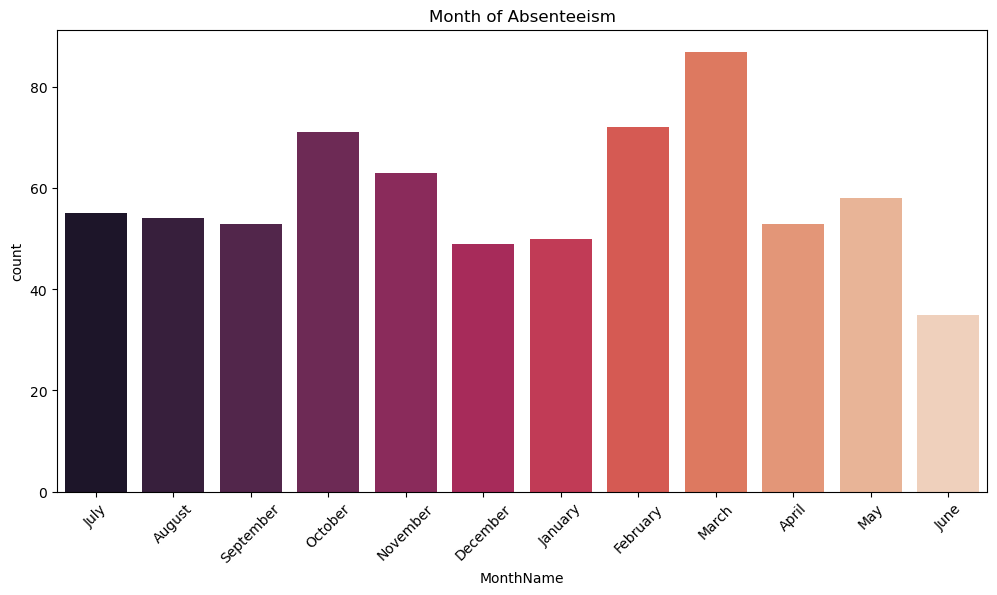

In [22]:

#Extract month names
df['MonthName'] = df['Date'].dt.strftime('%B')
# Initialize the plot
plt.figure(figsize=(12, 6))

# Create the count plot
sns.countplot(x='MonthName', data=df, palette='rocket')

# Set the title
plt.title('Month of Absenteeism')

# Rotate x-axis labels for beter readability
plt.xticks(rotation = 45)

# Display the plot
plt.show()


**Observation** : The result shows March having the highest count and June the lowest of absenteeism.

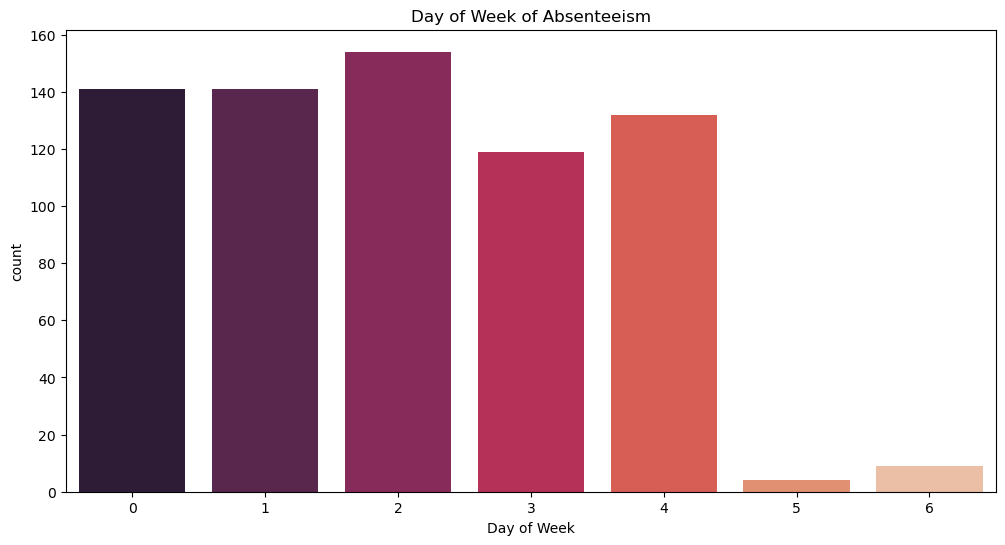

In [23]:
# Initialize the plot
plt.figure(figsize=(12, 6))

# Create the count plot
sns.countplot(x='Day of Week', data=df, palette='rocket')

# Set the title
plt.title('Day of Week of Absenteeism')

# Display the plot
plt.show()


**Observation** : The result shows the third day of week(Wednesday) having the highest count, while on sixth(Saturday) and seventh(Sunday) have the least count of absent.

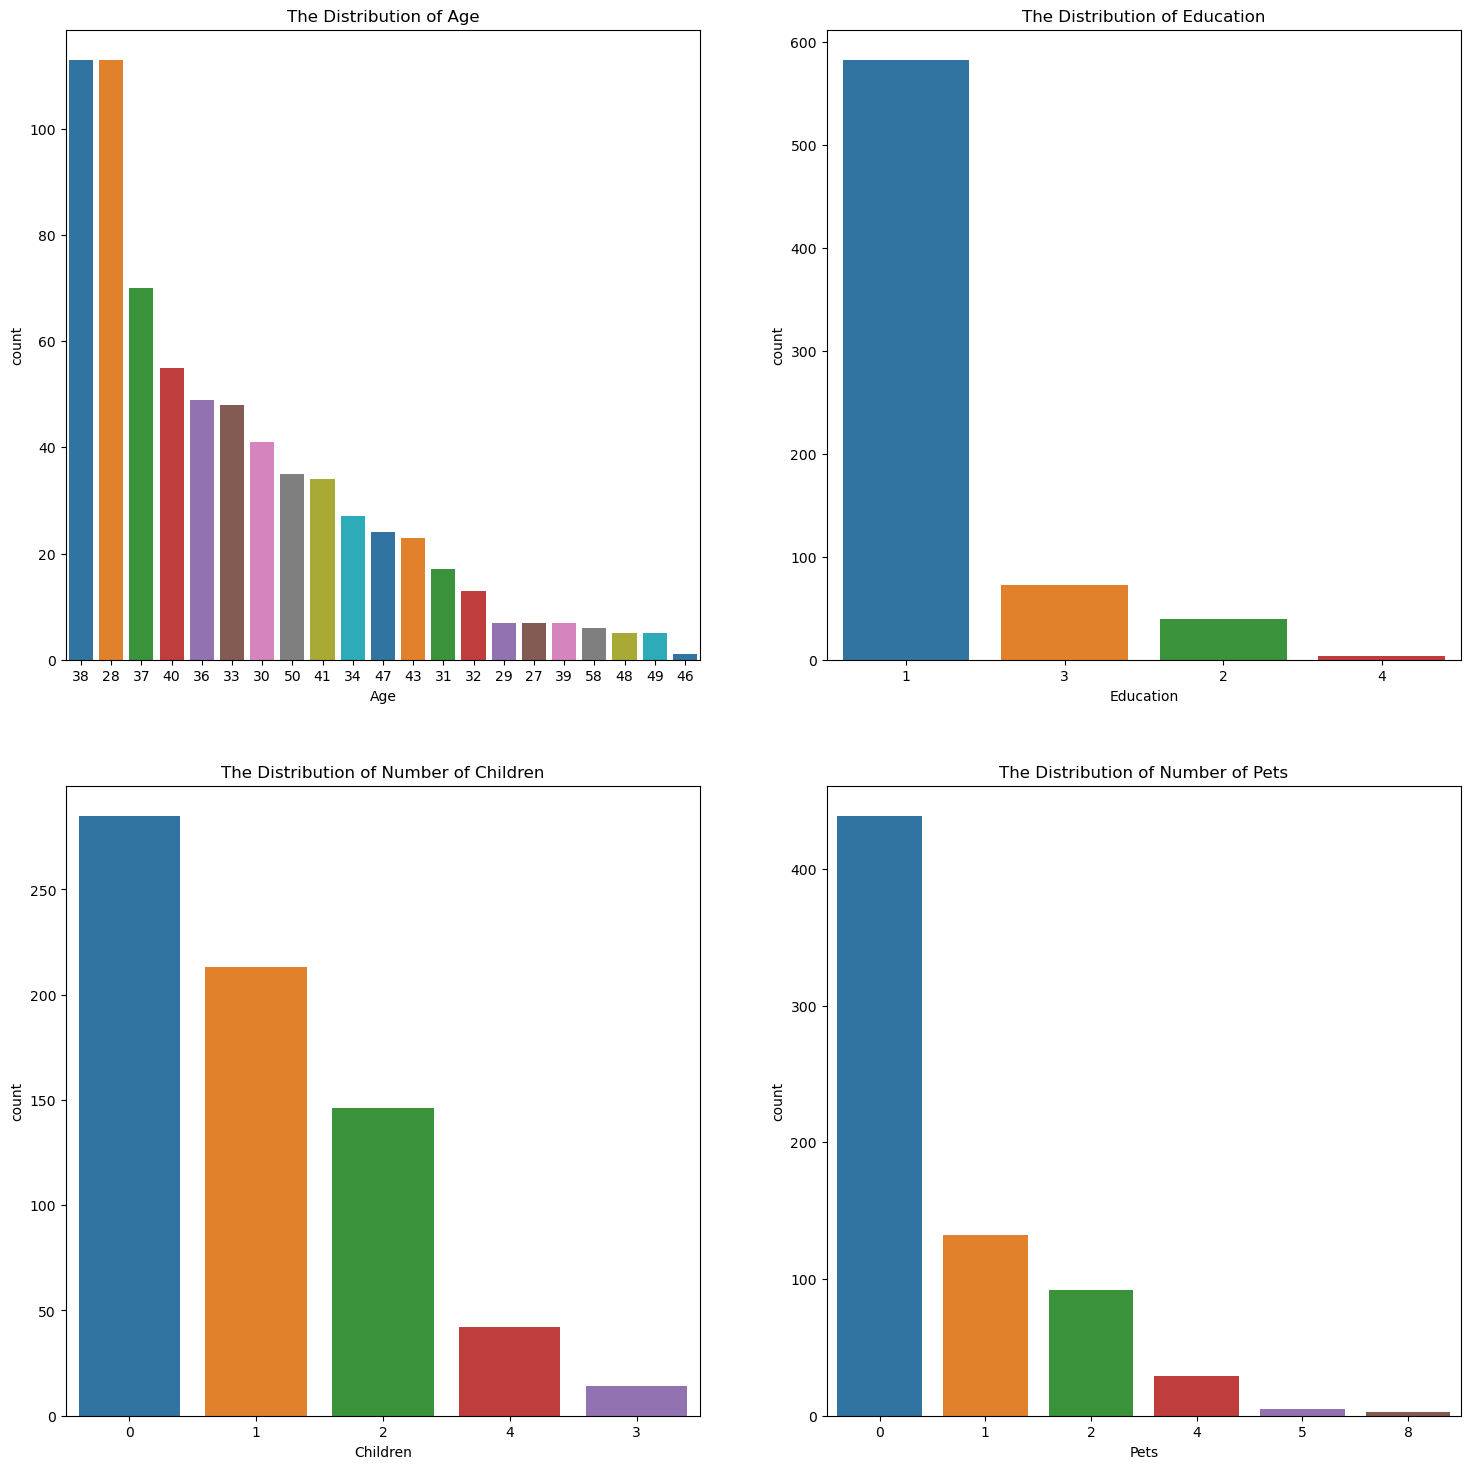

In [24]:
fig, axes = plt.subplots(2, 2, figsize = (18,18))

#First Plot
sns.countplot(ax = axes[0,0], x = 'Age', data = df, palette= 'tab10',
              order = df['Age'].value_counts().index);
axes[0,0].set_title('The Distribution of Age')

#Second Plot
sns.countplot(ax = axes[0,1], x = 'Education', data = df, palette= 'tab10',
              order = df['Education'].value_counts().index);
axes[0,1].set_title('The Distribution of Education')


#Third Plot
sns.countplot(ax = axes[1,0], x = 'Children', data = df, palette= 'tab10',
              order = df['Children'].value_counts().index);
axes[1,0].set_title('The Distribution of Number of Children')


#Fourth Plot
sns.countplot(ax = axes[1,1], x = 'Pets', data = df, palette= 'tab10',
              order = df['Pets'].value_counts().index);
axes[1,1].set_title('The Distribution of Number of Pets')

plt.show()


**Observation** :

Age Distribution:

1) The age group with the highest absenteeism is 38 years old.

2) Ages 28, 37, and 40 also show high absenteeism counts.

3) The distribution indicates that middle-aged employees are more frequently absent.

Education Level:

1) The highest absenteeism occurs among individuals with a High School education.

2) Graduates have the next highest absenteeism, followed by Post Graduates and those with Master/Doctor degrees.

3) This trend suggests that employees with higher education levels are less frequently absent.

Number of Children:

1) Employees with 0 children have the highest absenteeism, followed by those with 1 and 2 children.

2) There is a noticeable decrease in absenteeism among those with 4 children, while employees with 3 children show slightly higher absenteeism than those with 4.

3) This pattern might indicate that employees with no children or fewer children are more prone to absenteeism, possibly due to different lifestyle factors and responsibilities.

Number of Pets:

1) The highest absenteeism is observed among employees with 0 pets.

2) Employees with 1 and 2 pets also show significant absenteeism, with a decline as the number of pets increases.

3) This distribution suggests that pet ownership might be associated with lower absenteeism, potentially due to the sense of responsibility and routine that comes with taking care of pets.


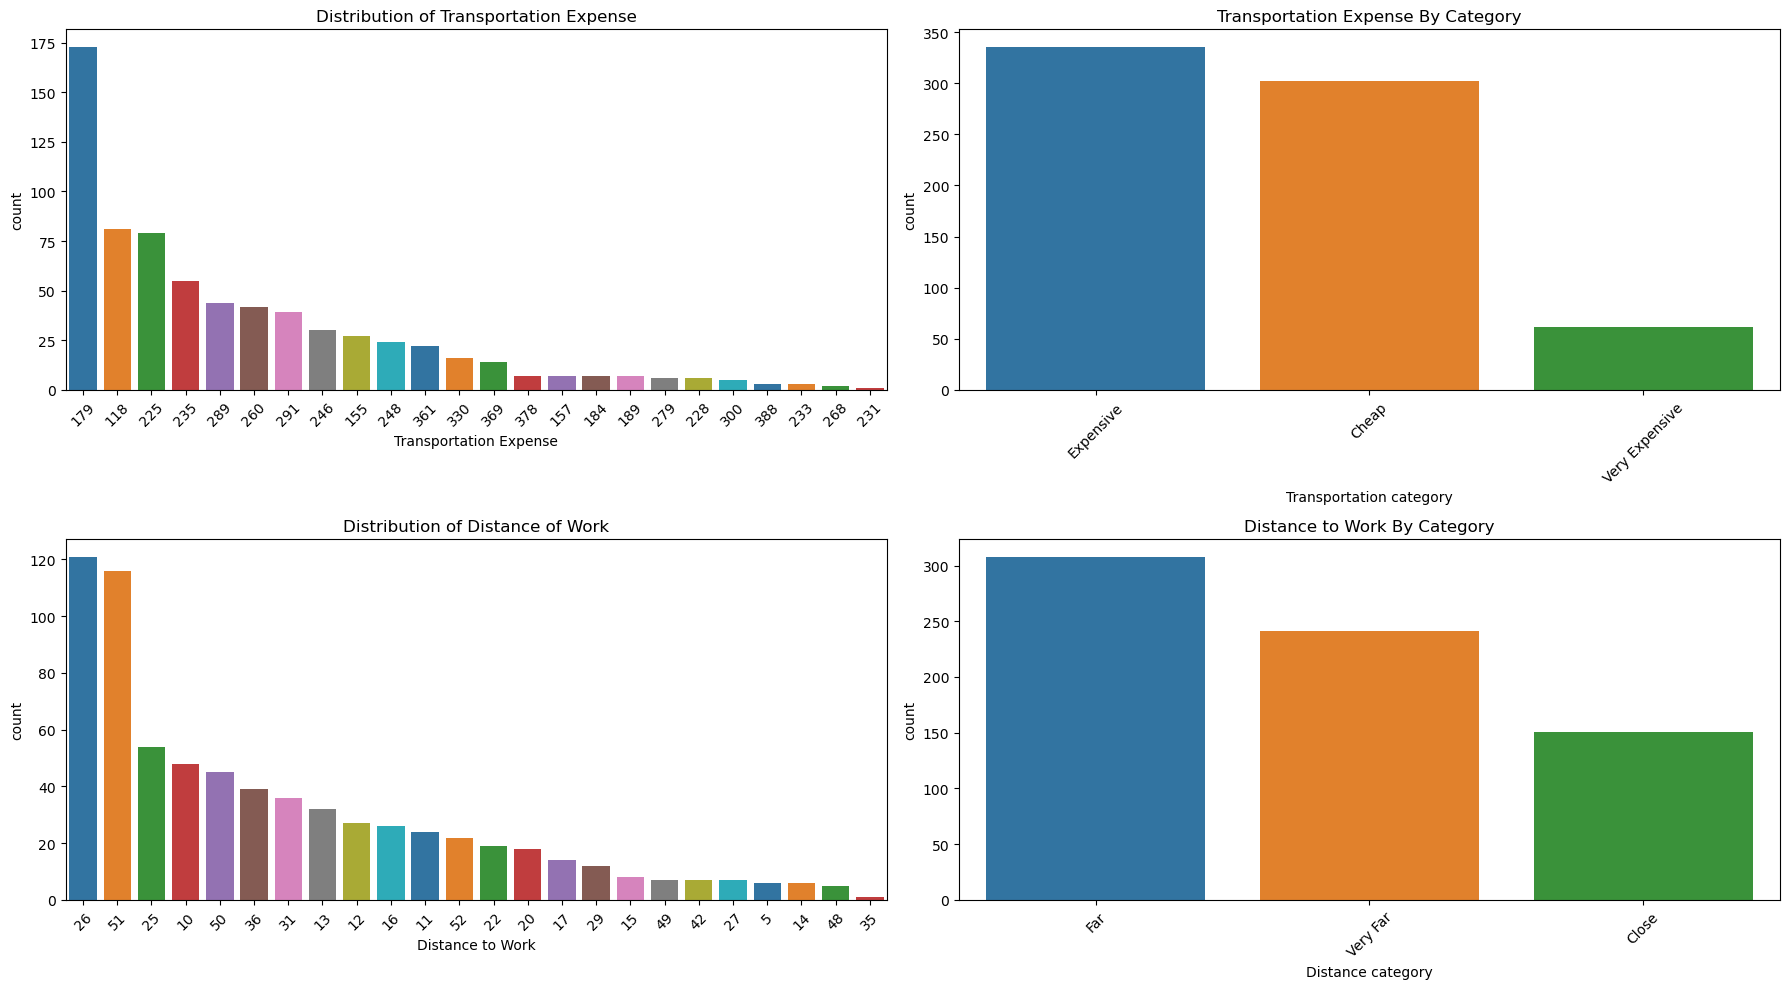

In [25]:
# Initialize the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Create the first count plot (left plot)
sns.countplot(ax=axes[0,0], x='Transportation Expense', data=df, palette='tab10', order=df['Transportation Expense'].value_counts().index)
axes[0,0].set_title('Distribution of Transportation Expense')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45)

#Transportation Expense by Category
sns.countplot(ax=axes[0,1], x='Transportation category', data=df, palette='tab10', order=df['Transportation category'].value_counts().index)
axes[0,1].set_title('Transportation Expense By Category')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)


# Create the second count plot (right plot)
sns.countplot(ax=axes[1,0], x='Distance to Work', data=df, palette='tab10', order=df['Distance to Work'].value_counts().index)
axes[1,0].set_title('Distribution of Distance of Work')
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45)

#Distance to Work by Category
sns.countplot(ax=axes[1,1], x='Distance category', data=df, palette='tab10', order=df['Distance category'].value_counts().index)
axes[1,1].set_title('Distance to Work By Category')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

**Observation**

- Transportation Expenses: The majority of people fall into the "Expensive" category, which means most individuals are spending a significant amount on their transportation.

- Distance to Work: Most people travel a "Far" distance to work, indicating that a significant portion of individuals commute long distances.